In [1]:
# TensorFlow and tf.keras

import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Dataset
# This dataset is included in keras and contains 60,000 images for training and 10,000 images for validation
    
fashion_mnist = keras.datasets.fashion_mnist  # load dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data() # splits into testing and training

4431872/4422102 [==============================] - 2s 0us/step


In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
# let's have a look at one pixel
train_images[0,23,23]

194

In [5]:
train_labels[:10] # first 10 training labels

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag','Ankle boot']

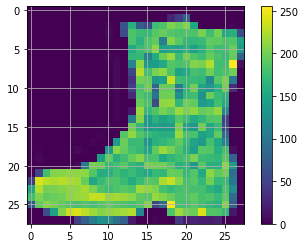

In [16]:
plt.figure()
plt.imshow(train_images[150])
plt.colorbar()
plt.grid(True)
plt.show()

In [18]:

train_images = train_images / 255.0

test_images = test_images / 255.0


# Building the Model

In [26]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),    # input layer
    keras.layers.Dense(128, activation='relu'),   # hidden layer
    keras.layers.Dense(10, activation='softmax')  # output layer
])

# Compile the Model

In [27]:
model.compile(optimizer='adam',  # algorithm that performs the gradient descent
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# Training the Model

In [38]:
model.fit(train_images, train_labels, epochs=1) # we pass the data, labels and epochs

1875/1875 [==============================] - 1s 726us/step - loss: 0.3036 - accuracy: 0.8907


# Evaluating the Model

In [39]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1)

print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 580us/step - loss: 0.3710 - accuracy: 0.8675
Test accuracy: 0.8675000071525574


# Making Predictions

In [40]:
predictions = model.predict(test_images)

In [53]:
predictions[2]

array([1.13758208e-04, 9.99817669e-01, 3.61182651e-06, 2.23649076e-05,
       4.23352212e-05, 1.53440521e-16, 1.95802073e-07, 2.31699243e-11,
       1.26326825e-08, 1.35387816e-12], dtype=float32)

If we want to get the value with the highest score we can use a function from numpy called argmax(). This simply returns the index if the maximum value from a numpy array.

In [54]:
np.argmax(predictions[1])

2

In [56]:
print(class_names[np.argmax(predictions[2])]) # this returns the class mane baed on nthe index

Trouser


# Verifying Predictions

Pick a number: 45


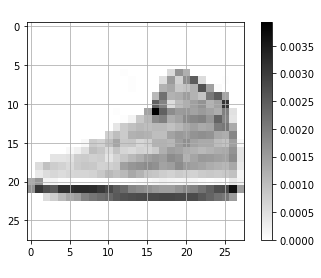

In [60]:
COLOR = 'white'
plt.rcParams['text.color']=COLOR
plt.rcParams['axes.labelcolor']=COLOR

def predict(model, image, correct_label):
    class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag','Ankle boot']
    prediction = model.predict(np.array([image]))
    predicted_class = class_names[np.argmax(prediction)]
    
    show_image(image, class_names[correct_label], predicted_class)
    
def show_image(img, label, guess):
    plt.figure()
    plt.imshow(img, cmap=plt.cm.binary)
    plt.title("Expected:" + label)
    plt.xlabel("Guess:" + guess)
    plt.colorbar()
    plt.grid()
    plt.show()
    
def get_number():
    while True:
        num = input("Pick a number: ")
        if num.isdigit():
            num = int(num)
            if 0<=num<=1000:
                return int(num)
            else:
                print("Try again....")
                
num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)
    